# PROBLEM STATEMENT
## Feature Extraction from Images

In this hackathon, the goal is to create a machine learning model that extracts entity values from images. This capability is crucial in fields like healthcare, e-commerce, and content moderation, where precise product information is vital. As digital marketplaces expand, many products lack detailed textual descriptions, making it essential to obtain key details directly from images. These images provide important information such as weight, volume, voltage, wattage, dimensions, and many more, which are critical for digital stores.

In [1]:
import matplotlib.pyplot as plt
from transformers import pipeline
import cv2
import torch
import pandas as pd
import re

c:\Python312\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


### Output Format:

The output file should be a csv with 2 columns:

1. `index:` The unique identifier (ID) of the data sample. Note the index should match the test record index.
2. `prediction:` A string which should have the following format: “x unit” where x is a float number in standard formatting and unit is one of the allowed units (allowed units are mentioned in the Appendix). The two values should be concatenated and have a space between them. For eg: “2 gram”, “12.5 centimetre”, “2.56 ounce” are valid. Few invalid cases: “2 gms”, “60 ounce/1.7 kilogram”, “2.2e2 kilogram” etc.
    Note: Make sure to output a prediction for all indices. If no value is found in the image for any test sample, return empty string, i.e, `“”`. If you have less/more number of output samples in the output file as compared to test.csv, your output won’t be evaluated. 

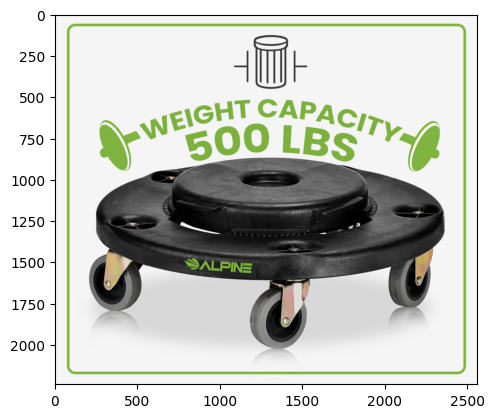

In [16]:
random_img = cv2.imread('./Amazon_images/images/81aZ2ozp1GL.jpg')
plt.imshow(cv2.cvtColor(random_img,cv2.COLOR_BGR2RGB))

### Data Description: 

The dataset consists of the following columns: 

1. **index:** An unique identifier (ID) for the data sample
2. **image_link**: Public URL where the product image is available for download. Example link - https://m.media-amazon.com/images/I/71XfHPR36-L.jpg
    To download images use `download_images` function from `src/utils.py`. See sample code in `src/test.ipynb`.
3. **group_id**: Category code of the product
4. **entity_name:** Product entity name. For eg: “item_weight” 
5. **entity_value:** Product entity value. For eg: “34 gram” 
    Note: For test.csv, you will not see the column `entity_value` as it is the target variable.

# Should use OCR (NOTED)


- https://www.e3s-conferences.org/articles/e3sconf/pdf/2023/28/e3sconf_icmed-icmpc2023_01016.pdf (This is a basic model and It ony calculates dimension)

In [17]:
!sudo apt install tesseract-ocr

'sudo' is not recognized as an internal or external command,
operable program or batch file.


In [18]:
import easyocr

In [19]:
reader = easyocr.Reader(['en'],gpu=True)

In [20]:
result = reader.readtext("./Amazon_images/images/41zgjN+zW3L.jpg")
# (location, text, confidence)
result

[([[896, 440], [942, 440], [942, 464], [896, 464]], '44"', 0.719994306564331),
 ([[302, 734], [418, 734], [418, 764], [302, 764]],
  '6.75 LBS',
  0.9019485176508698)]

In [21]:
!tesseract

Usage:
  tesseract --help | --help-extra | --version
  tesseract --list-langs
  tesseract imagename outputbase [options...] [configfile...]

OCR options:
  -l LANG[+LANG]        Specify language(s) used for OCR.
NOTE: These options must occur before any configfile.

Single options:
  --help                Show this help message.
  --help-extra          Show extra help for advanced users.
  --version             Show version information.
  --list-langs          List available languages for tesseract engine.


In [22]:
import pytesseract

text = pytesseract.image_to_string(random_img)

print(text)

4+




In [23]:
test = pd.read_csv('./train_with_extracted_text.csv',encoding='latin-1')
test

,image_link,group_id,entity_name,entity_value,extracted_text
0,https://m.media-amazon.com/images/I/612mrlqiI4...,459516,item_weight,0.709 gram,NaN
1,https://m.media-amazon.com/images/I/61QsBSE7jg...,731432,item_weight,1400 milligram,¢ Naturally-Sourced Psyllium _ * High stren...
2,https://m.media-amazon.com/images/I/61oMj2iXOu...,308856,item_weight,10 kilogram to 15 kilogram,i) WILDFANG 35cm 12cm 13cm 14cm 15cm 16cm ...
3,https://m.media-amazon.com/images/I/61BZ4zrjZX...,459516,item_weight,0.709 gram,Serving Size: 1 Tablet (0.709 g) | Each servin...
4,https://m.media-amazon.com/images/I/71gSRbyXmo...,916768,item_volume,1.0 cup,GEPRAGTES Designed in LIZENZIERTE UND GESCHU...
...,...,...,...,...,...
494,https://m.media-amazon.com/images/I/81L5nXqWeL...,731432,item_weight,8.0 kilogram,Power through workouts. Nutrition Facts Serv...
495,https://m.media-amazon.com/images/I/71FcYrlHEE...,459516,item_weight,100 gram,Ashwagandha Root Powder Withania Somnifera A...
496,https://m.media-amazon.com/images/I/71uyQ21zqV...,459516,item_weight,100 gram,Shatavari Root Powder Asperagus Racemosus o...
497,https://m.media-amazon.com/images/I/81elFizoqg...,459516,item_weight,100 gram,Ashwagandha Root Powder Withania Somnifera B...


In [24]:
text = test['extracted_text']

In [25]:
cnt = 0
def find_nums(text):
    numbers = re.findall(r'(\d+)',text)
    cnt+=len(numbers)
    return

In [26]:
sample = find_nums(test['extracted_text'][1])

In [27]:
print(test['extracted_text'][1])

¢ Naturally-Sourced Psyllium  _  * High strength 1400mg per serving Ta a aes ein Laie ss  PLANTAGO Co PLANT SEEDs a  * Suitable for Vegans & Vegetarians  t = Bho 365 esau)  | A  Horbaach


In [29]:
sample

(2, ['1400', '365'])

In [3]:
test_data_out = pd.read_csv('./metadata/student_resource 3/dataset/test_with_extracted_text.csv',encoding='latin-1')

In [4]:
test_data_out.head()

,index,image_link,group_id,entity_name,extracted_text
0,19,https://m.media-amazon.com/images/I/218BCzgKxu...,348551,voltage,208-240V 146A 60Hz Black u Black Red 2 Whi...
1,16,https://m.media-amazon.com/images/I/2174yonQBt...,569206,maximum_weight_recommendation,NaN
2,18,https://m.media-amazon.com/images/I/218BCzgKxu...,348551,wattage,208-240V 146A 60Hz Black u Black Red 2 Whi...
3,1,https://m.media-amazon.com/images/I/11TU2clswz...,792578,width,"Size Width Length One Size 42cm/16.54"" 200cmi7..."
4,0,https://m.media-amazon.com/images/I/110EibNycl...,156839,height,= 7 O| i


In [6]:
test_data_out.shape

(131187, 5)

In [5]:
test_data_out.isna().sum()

index                 0
image_link            0
group_id              0
entity_name           0
extracted_text    23572
dtype: int64

In [7]:
((test_data_out.shape[0] - 23572)/test_data_out.shape[0])*100

82.03175619535472

In [9]:
import torch
from transformers import AutoTokenizer, LlamaForCausalLM

# Load the tokenizer and model
model_path = "nvidia/Llama-3.1-Minitron-4B-Width-Base"
tokenizer = AutoTokenizer.from_pretrained(model_path)

device = 'cuda'
dtype = torch.bfloat16
model = LlamaForCausalLM.from_pretrained(model_path, torch_dtype=dtype, device_map=device)

# Prepare the input text
prompt = 'Complete the paragraph: our solar system is'
inputs = tokenizer.encode(prompt, return_tensors='pt').to(model.device)

# Generate the output
outputs = model.generate(inputs, max_length=20)

# Decode and print the output
output_text = tokenizer.decode(outputs[0])
print(output_text)


Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


ValueError: `rope_scaling` must be a dictionary with two fields, `type` and `factor`, got {'factor': 8.0, 'high_freq_factor': 4.0, 'low_freq_factor': 1.0, 'original_max_position_embeddings': 8192, 'rope_type': 'llama3'}

In [6]:
from huggingface_hub import interpreter_login

In [7]:
interpreter_login()


    _|    _|  _|    _|    _|_|_|    _|_|_|  _|_|_|  _|      _|    _|_|_|      _|_|_|_|    _|_|      _|_|_|  _|_|_|_|
    _|    _|  _|    _|  _|        _|          _|    _|_|    _|  _|            _|        _|    _|  _|        _|
    _|_|_|_|  _|    _|  _|  _|_|  _|  _|_|    _|    _|  _|  _|  _|  _|_|      _|_|_|    _|_|_|_|  _|        _|_|_|
    _|    _|  _|    _|  _|    _|  _|    _|    _|    _|    _|_|  _|    _|      _|        _|    _|  _|        _|
    _|    _|    _|_|      _|_|_|    _|_|_|  _|_|_|  _|      _|    _|_|_|      _|        _|    _|    _|_|_|  _|_|_|_|

    A token is already saved on your machine. Run `huggingface-cli whoami` to get more information or `huggingface-cli logout` if you want to log out.
    Setting a new token will erase the existing one.
    To login, `huggingface_hub` requires a token generated from https://huggingface.co/settings/tokens .
Token can be pasted using 'Right-Click'.
Token is valid (permission: write).
Your token has been saved to C:\Users\vis

In [8]:
import transformers
import torch

model_id = "meta-llama/Meta-Llama-3-8B"

pipeline = transformers.pipeline("text-generation", model=model_id, model_kwargs={"torch_dtype": torch.bfloat16}, device_map="auto")
pipeline("Hey how are you doing today?")

OSError: You are trying to access a gated repo.
Make sure to have access to it at https://huggingface.co/meta-llama/Meta-Llama-3-8B.
403 Client Error. (Request ID: Root=1-66e72878-114b0b30382e460853ed5f08;35e5779e-66f5-42c6-b798-b0e586a1e486)

Cannot access gated repo for url https://huggingface.co/meta-llama/Meta-Llama-3-8B/resolve/main/config.json.
Your request to access model meta-llama/Meta-Llama-3-8B is awaiting a review from the repo authors.

In [5]:
from doctr.doctr.io import DocumentFile
# PDF
# pdf_doc = DocumentFile.from_pdf("path/to/your/doc.pdf")
# Image
# single_img_doc = DocumentFile.from_images("./download.jpg")
# Webpage (requires `weasyprint` to be installed)
webpage_doc = DocumentFile.from_url("https://m.media-amazon.com/images/I/41-NCxNuBxL.jpg")
# # Multiple page images
# multi_img_doc = DocumentFile.from_images(["path/to/page1.jpg", "path/to/page2.jpg"])

ModuleNotFoundError: No module named 'doctr.file_utils'